In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('C:/Users/SEC/OneDrive/바탕 화면/source/python_stat_sample-master/data/ch2_scores_em.csv',index_col='student number')

In [5]:
df.describe()

,english,mathematics
count,50.000000,50.000000
mean,58.380000,78.880000
std,9.799813,8.414371
min,37.000000,57.000000
25%,54.000000,76.000000
50%,57.500000,80.000000
75%,65.000000,84.000000
max,79.000000,94.000000


In [13]:
en_scores=np.array(df.english)[:10]

In [14]:
ma_scores=np.array(df.mathematics)[:10]

In [15]:
scores_df=pd.DataFrame({'english':en_scores,'mathematics':ma_scores},index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))

In [16]:
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [17]:
summary_df = scores_df.copy()

In [18]:
summary_df['english_deviation']=summary_df.english-summary_df.english.mean()
summary_df['mathematics_deviation']=summary_df.mathematics-summary_df.mathematics.mean()
summary_df['product of deviation']=summary_df.english_deviation*summary_df.mathematics_deviation

In [19]:
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [20]:
summary_df['product of deviation'].mean()

62.8

In [21]:
cov_mat =np.cov(en_scores,ma_scores,ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [24]:
(np.cov(en_scores,ma_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ma_scores))).round(3)

0.819

In [26]:
np.corrcoef(en_scores,ma_scores).round(3)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [27]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [28]:
import matplotlib.pyplot as plt

In [30]:
english_scores=np.array(df.english)
math_scores=np.array(df.mathematics)

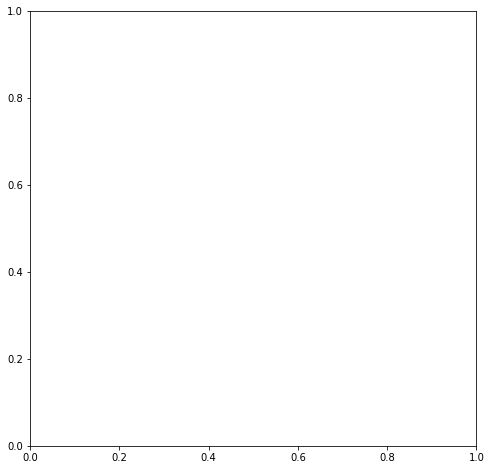

In [31]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

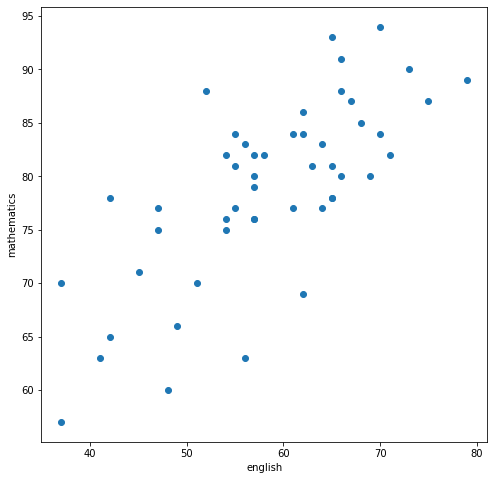

In [33]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

ax.scatter(english_scores,math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

### np.polyfit(x, y, deg(차수), rcond=None, full=False, w=None, cov=False)

In [38]:
poly_fit=np.polyfit(english_scores,math_scores,1)
poly_fit

array([ 0.62142302, 42.60132433])

In [41]:
poly_1d=np.poly1d(poly_fit)
poly_1d

poly1d([ 0.62142302, 42.60132433])

In [43]:
xs=np.linspace(english_scores.min(),english_scores.max())
ys=poly_1d(xs)

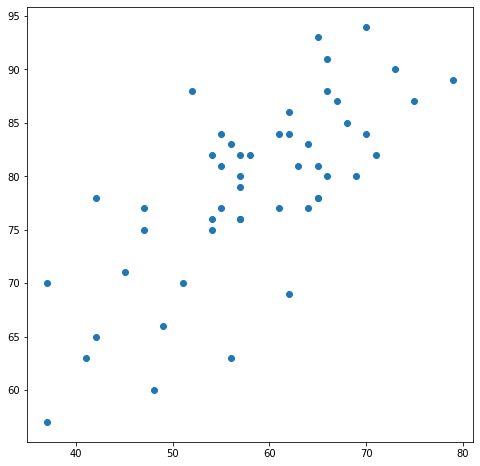

In [46]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(english_scores,math_scores,label='score')

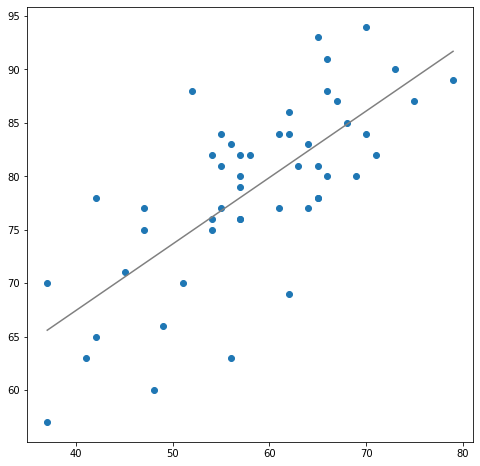

In [49]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(english_scores,math_scores,label='score')
ax.plot(xs,ys,color='gray',label=f'{poly_fit[1]:2f}+{poly_fit[0]:2f}')

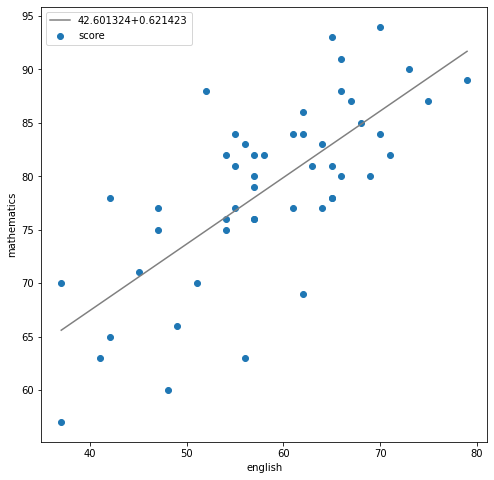

In [51]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(english_scores,math_scores,label='score')
ax.plot(xs,ys,color='gray',label=f'{poly_fit[1]:2f}+{poly_fit[0]:2f}')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.legend(loc='upper left')

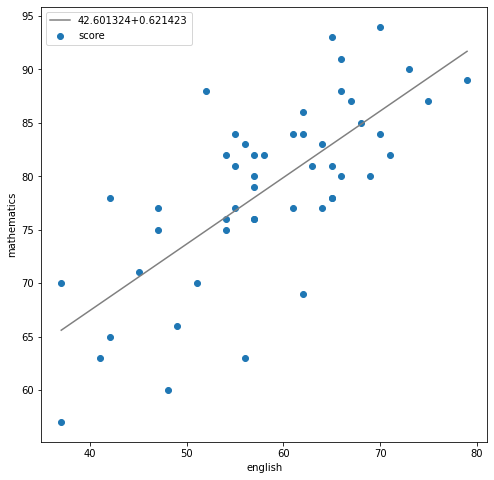

In [52]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.scatter(english_scores,math_scores,label='score')
ax.plot(xs,ys,color='gray',label=f'{poly_fit[1]:2f}+{poly_fit[0]:2f}')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.legend(loc='upper left')

plt.show()

ax.hist2d(
    x, 
    y,
    bins=10, 간격의 수
    range=None, 범주값
    density=False,
    weights=None,
    cmin=None,
    cmax=None,
    *,
    data=None,
    **kwargs,
)

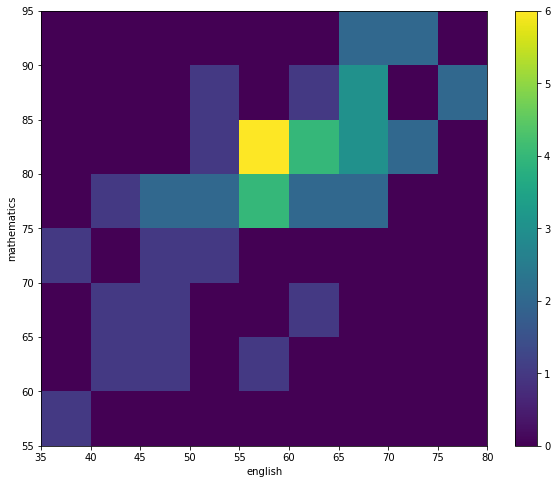

In [60]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)

c=ax.hist2d(english_scores,math_scores,bins=[9,8],range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3],ax=ax)
plt.show()

In [54]:
c

(array([[1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 0., 0., 0.],
        [0., 1., 1., 1., 2., 0., 0., 0.],
        [0., 0., 0., 1., 2., 1., 1., 0.],
        [0., 1., 0., 0., 4., 6., 0., 0.],
        [0., 0., 1., 0., 2., 4., 1., 0.],
        [0., 0., 0., 0., 2., 3., 3., 2.],
        [0., 0., 0., 0., 0., 2., 0., 2.],
        [0., 0., 0., 0., 0., 0., 2., 0.]]),
 array([35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 array([55., 60., 65., 70., 75., 80., 85., 90., 95.]),
 <matplotlib.collections.QuadMesh at 0x1c0e5e99d08>)

In [55]:
c[1]

array([35., 40., 45., 50., 55., 60., 65., 70., 75., 80.])

In [56]:
c[3]